### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda_1 = pd.read_csv(url)
tienda_2 = pd.read_csv(url2)
tienda_3 = pd.read_csv(url3)
tienda_4 = pd.read_csv(url4)

tienda_1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


PREPARACION DE DATOS

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def build_tidy_from_globals():
    """
    Une tienda_1 ... tienda_4 en un solo DataFrame `tidy`,
    agregando una columna 'Tienda' y tipificando columnas clave.
    """
    dfs = []
    for i in [1, 2, 3, 4]:
        name = f"tienda_{i}"
        if name in globals():
            d = globals()[name].copy()
            d["Tienda"] = name
            dfs.append(d)
    if not dfs:
        raise RuntimeError("No encontré dataframes tienda_1 ... tienda_4 en el entorno.")
    tidy = pd.concat(dfs, ignore_index=True)


    for col in ["Precio", "Costo de envío", "Calificación"]:
        if col in tidy.columns:
            tidy[col] = pd.to_numeric(tidy[col], errors="coerce")


    if "Fecha de Compra" in tidy.columns:
        tidy["Fecha de Compra"] = pd.to_datetime(tidy["Fecha de Compra"], errors="coerce")

    return tidy

tidy = build_tidy_from_globals()
display(tidy.head())
print("Registros totales:", len(tidy))


/tmp/ipython-input-305209445.py:28: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  tidy["Fecha de Compra"] = pd.to_datetime(tidy["Fecha de Compra"], errors="coerce")


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,2021-01-16,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,tienda_1
1,Mesa de comedor,Muebles,192300.0,8400.0,2022-05-18,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,tienda_1
2,Juego de mesa,Juguetes,209600.0,15900.0,2021-03-15,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,tienda_1
3,Microondas,Electrodomésticos,757500.0,41000.0,2022-05-03,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,tienda_1
4,Silla de oficina,Muebles,335200.0,20200.0,2020-11-07,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,tienda_1


Registros totales: 9435


#1. Análisis de facturación



,Facturación
Tienda,
tienda_1,1.150880e+09
tienda_2,1.116344e+09
tienda_3,1.098020e+09
tienda_4,1.038376e+09


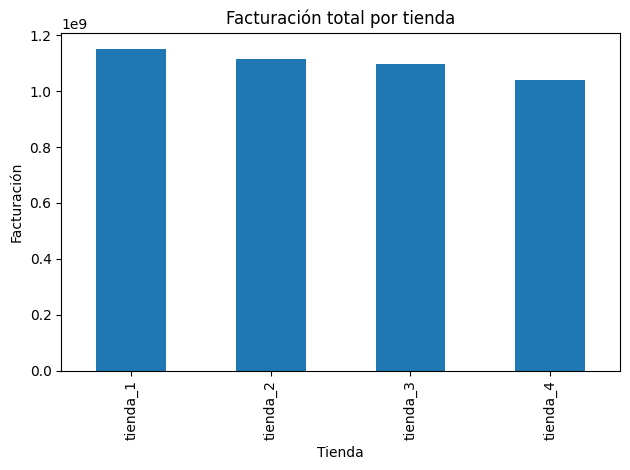

In [4]:
# ===== Facturación total por tienda =====
facturacion = tidy.groupby("Tienda")["Precio"].sum().sort_values(ascending=False)
display(facturacion.to_frame(name="Facturación"))

# Gráfico: Facturación por tienda
plt.figure()
facturacion.plot(kind="bar", legend=False)
plt.title("Facturación total por tienda")
plt.xlabel("Tienda")
plt.ylabel("Facturación")
plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [5]:
# ===== Ventas por categoría =====
ventas_cat = (
    tidy.groupby(["Tienda", "Categoría del Producto"])["Producto"]
        .count()
        .rename("Ventas")
        .reset_index()
)

# Top 3 categorías por tienda
top3_cat = (
    ventas_cat
    .sort_values(["Tienda", "Ventas"], ascending=[True, False])
    .groupby("Tienda")
    .head(3)
    .reset_index(drop=True)
)

display(top3_cat)


,Tienda,Categoría del Producto,Ventas
0,tienda_1,Muebles,465
1,tienda_1,Electrónicos,448
2,tienda_1,Juguetes,324
3,tienda_2,Muebles,442
4,tienda_2,Electrónicos,422
5,tienda_2,Juguetes,313
6,tienda_3,Muebles,499
7,tienda_3,Electrónicos,451
8,tienda_3,Juguetes,315
9,tienda_4,Muebles,480


# 3. Calificación promedio de la tienda


,Calificación Promedio
Tienda,
tienda_1,3.98
tienda_2,4.04
tienda_3,4.05
tienda_4,4.00


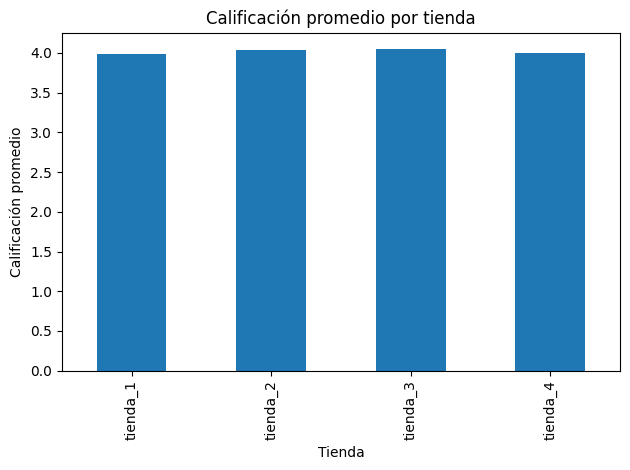

In [6]:
# ===== Calificación promedio =====
calificacion_prom = tidy.groupby("Tienda")["Calificación"].mean().round(2)
display(calificacion_prom.to_frame(name="Calificación Promedio"))

# Gráfico
plt.figure()
calificacion_prom.plot(kind="bar", legend=False)
plt.title("Calificación promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación promedio")
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [7]:
# ===== Productos más y menos vendidos =====
ventas_prod = (
    tidy.groupby(["Tienda", "Producto"])
        .size()
        .rename("Ventas")
        .reset_index()
)

top3_prod = (
    ventas_prod
    .sort_values(["Tienda", "Ventas"], ascending=[True, False])
    .groupby("Tienda")
    .head(3)
    .reset_index(drop=True)
)

bottom3_prod = (
    ventas_prod
    .sort_values(["Tienda", "Ventas"], ascending=[True, True])
    .groupby("Tienda")
    .head(3)
    .reset_index(drop=True)
)

print(">>> Top 3 productos por tienda")
display(top3_prod)

print(">>> Bottom 3 productos por tienda")
display(bottom3_prod)


>>> Top 3 productos por tienda


,Tienda,Producto,Ventas
0,tienda_1,Armario,60
1,tienda_1,Microondas,60
2,tienda_1,TV LED UHD 4K,60
3,tienda_2,Iniciando en programación,65
4,tienda_2,Microondas,62
5,tienda_2,Batería,61
6,tienda_3,Kit de bancas,57
7,tienda_3,Cama king,56
8,tienda_3,Mesa de comedor,56
9,tienda_4,Cama box,62


>>> Bottom 3 productos por tienda


,Tienda,Producto,Ventas
0,tienda_1,Auriculares con micrófono,33
1,tienda_1,Celular ABXY,33
2,tienda_1,Olla de presión,35
3,tienda_2,Juego de mesa,32
4,tienda_2,Impresora,34
5,tienda_2,Mesa de comedor,34
6,tienda_3,Bloques de construcción,35
7,tienda_3,Microondas,36
8,tienda_3,Mochila,36
9,tienda_4,Guitarra eléctrica,33


# 5. Envío promedio por tienda

,Costo de envío promedio
Tienda,
tienda_1,26018.61
tienda_2,25216.24
tienda_3,24805.68
tienda_4,23459.46


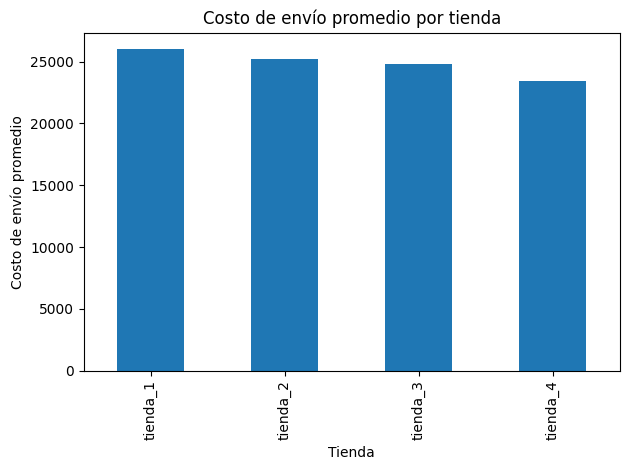

In [8]:
# ===== Costo de envío promedio =====
envio_prom = tidy.groupby("Tienda")["Costo de envío"].mean().round(2).sort_values(ascending=False)
display(envio_prom.to_frame(name="Costo de envío promedio"))

# Gráfico
plt.figure()
envio_prom.plot(kind="bar", legend=False)
plt.title("Costo de envío promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo de envío promedio")
plt.tight_layout()
plt.show()


In [9]:



if "facturacion" not in globals():
    facturacion = tidy.groupby("Tienda")["Precio"].sum()

if "calificacion_prom" not in globals():
    calificacion_prom = tidy.groupby("Tienda")["Calificación"].mean().round(2)

if "envio_prom" not in globals():
    envio_prom = tidy.groupby("Tienda")["Costo de envío"].mean().round(2)

num_ventas = tidy.groupby("Tienda").size().rename("Número de ventas")
ticket_prom = (facturacion / num_ventas).rename("Ticket promedio")

resumen = pd.concat(
    [
        facturacion.rename("Facturación"),
        num_ventas,
        ticket_prom,
        calificacion_prom.rename("Calificación promedio"),
        envio_prom.rename("Costo envío promedio"),
    ],
    axis=1
).sort_values("Facturación", ascending=False)

display(resumen)


tienda_menor_fact = resumen.sort_values("Facturación").index[0]
tienda_menor_ticket = resumen.sort_values("Ticket promedio").index[0]

print("===========================================")
print("Recomendación automática (baseline):")
print(f"- Menor facturación total: {tienda_menor_fact}")
print(f"- Menor ticket promedio:   {tienda_menor_ticket}")

if tienda_menor_fact == tienda_menor_ticket:
    print(f"\nSugerencia: vender {tienda_menor_fact} (coinciden facturación y ticket).")
else:
    print(f"\nSugerencia: vender {tienda_menor_fact} (por facturación) y revisar {tienda_menor_ticket} por bajo ticket promedio.")
print("===========================================")


,Facturación,Número de ventas,Ticket promedio,Calificación promedio,Costo envío promedio
Tienda,,,,,
tienda_1,1.150880e+09,2359,487867.910131,3.98,26018.61
tienda_2,1.116344e+09,2359,473227.426876,4.04,25216.24
tienda_3,1.098020e+09,2359,465459.771089,4.05,24805.68
tienda_4,1.038376e+09,2358,440362.892282,4.00,23459.46


Recomendación automática (baseline):
- Menor facturación total: tienda_4
- Menor ticket promedio:   tienda_4

Sugerencia: vender tienda_4 (coinciden facturación y ticket).
